# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Checking single City

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1674070356,
    "id": 2643743,
    "main": {
        "feels_like": 1.8,
        "humidity": 88,
        "pressure": 1001,
        "temp": 1.8,
        "temp_max": 3.23,
        "temp_min": -0.25
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1674028620,
        "sunset": 1674059049,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 241,
        "gust": 1.34,
        "speed": 0.89
    }
}


In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lon"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | brae
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | tibiao
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | pochutla
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | kurchum
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | iskateley
Processing Record 37 of Set 4 | olinda
Processing Record 38 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | sioux lookout
Processing Record 42 of Set 4 | nyurba
Processing Record 43 of Set 4 | buchanan
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | lorengau
Processing Record 47 of Set 4 | saint-francois
Processing Record 48 of Set 4 | port arthur
Processing Record 49 of Set 4 | chebsara
Processing Record 0 of Set 5 | shawville
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | challapata
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | chara
Processing Record 5 of Set 5 | joshimath
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | nichinan
Processing Record 8 of Set 5 

Processing Record 22 of Set 8 | bako
Processing Record 23 of Set 8 | catuday
Processing Record 24 of Set 8 | sibolga
Processing Record 25 of Set 8 | ulundi
Processing Record 26 of Set 8 | vidim
Processing Record 27 of Set 8 | sambava
Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | tuy hoa
Processing Record 31 of Set 8 | tucuman
Processing Record 32 of Set 8 | arvika
Processing Record 33 of Set 8 | berdigestyakh
Processing Record 34 of Set 8 | port blair
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | noyabrsk
Processing Record 37 of Set 8 | dunedin
Processing Record 38 of Set 8 | krasnyy chikoy
Processing Record 39 of Set 8 | sorland
Processing Record 40 of Set 8 | tukrah
Processing Record 41 of Set 8 | umm durman
City not found. Skipping...
Processing Record 42 of Set 8 | hatillo
Processing Record 43 of Set 8 | tignere
Processing Record 44 of Set 8 | stamsund
City not found. Skipping...
Processin

Processing Record 11 of Set 12 | bartica
Processing Record 12 of Set 12 | hovd
Processing Record 13 of Set 12 | pisco
Processing Record 14 of Set 12 | krivogastani
Processing Record 15 of Set 12 | najran
Processing Record 16 of Set 12 | haines junction
Processing Record 17 of Set 12 | cabo san lucas
Processing Record 18 of Set 12 | ternate
Processing Record 19 of Set 12 | jiroft
City not found. Skipping...
Processing Record 20 of Set 12 | narsaq
Processing Record 21 of Set 12 | roebourne
Processing Record 22 of Set 12 | toamasina
Processing Record 23 of Set 12 | abu dhabi
Processing Record 24 of Set 12 | siguiri
Processing Record 25 of Set 12 | sinkat
City not found. Skipping...
Processing Record 26 of Set 12 | riyadh
Processing Record 27 of Set 12 | senigallia
Processing Record 28 of Set 12 | san cristobal
Processing Record 29 of Set 12 | camacupa
Processing Record 30 of Set 12 | boende
Processing Record 31 of Set 12 | tapaua
City not found. Skipping...
Processing Record 32 of Set 12 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,brae,-1.3530,60.3964,3.25,65,91,9.96,GB,1674070898
1,ostrovnoy,39.5131,68.0531,-3.42,89,100,7.14,RU,1674070501
2,hobart,147.3294,-42.8794,10.92,71,75,6.69,AU,1674070899
3,jamestown,-79.2353,42.0970,3.34,72,100,4.63,US,1674070899
4,tibiao,122.0354,11.2915,25.67,81,100,2.44,PH,1674070900


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brae,-1.3530,60.3964,3.25,65,91,9.96,GB,1674070898
1,ostrovnoy,39.5131,68.0531,-3.42,89,100,7.14,RU,1674070501
2,hobart,147.3294,-42.8794,10.92,71,75,6.69,AU,1674070899
3,jamestown,-79.2353,42.0970,3.34,72,100,4.63,US,1674070899
4,tibiao,122.0354,11.2915,25.67,81,100,2.44,PH,1674070900


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

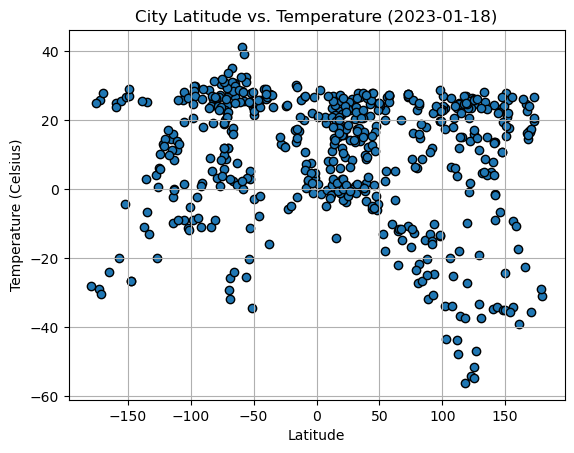

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

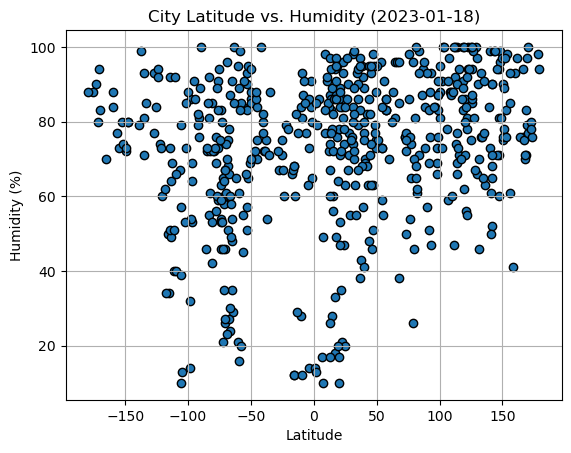

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

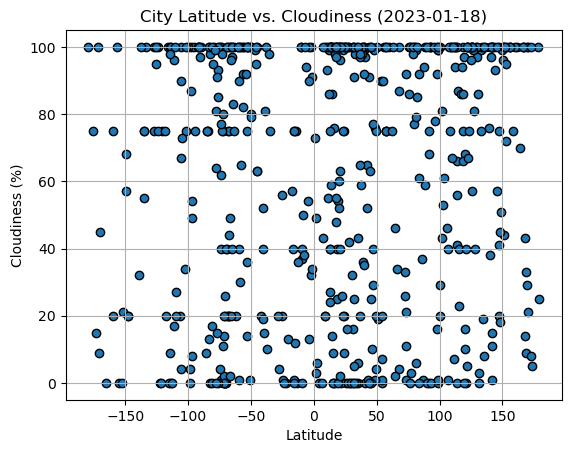

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

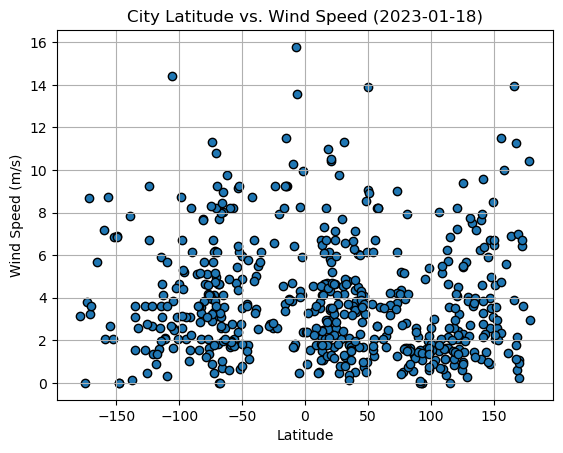

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel(title)
    plt.xlabel("Latitude")
    plt.annotate(line_eq,(text_coordinates),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ostrovnoy,39.5131,68.0531,-3.42,89,100,7.14,RU,1674070501
2,hobart,147.3294,-42.8794,10.92,71,75,6.69,AU,1674070899
4,tibiao,122.0354,11.2915,25.67,81,100,2.44,PH,1674070900
7,ulladulla,150.4667,-35.3500,15.41,90,100,6.48,AU,1674070901
9,carnarvon,113.6333,-24.8667,24.90,77,41,5.72,AU,1674070901


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brae,-1.3530,60.3964,3.25,65,91,9.96,GB,1674070898
3,jamestown,-79.2353,42.0970,3.34,72,100,4.63,US,1674070899
5,albany,-73.9662,42.6001,5.93,83,100,0.89,US,1674070745
6,upernavik,-56.1549,72.7868,-25.45,84,100,1.85,GL,1674070900
8,avarua,-159.7750,-21.2078,25.03,88,75,7.20,CK,1674070643


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.04071004965351194
y = -0.08x +13.99


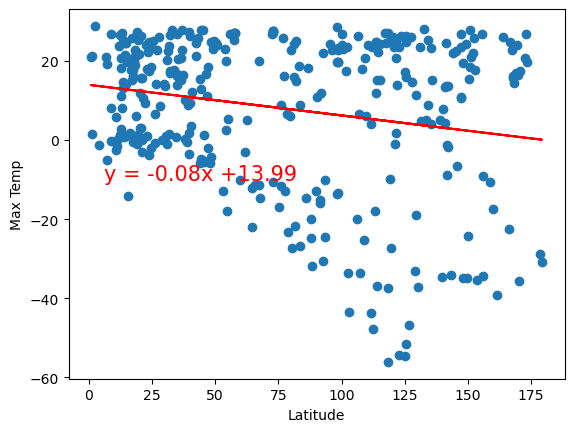

In [16]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp", (6,-10))

The r-value is: 0.038298599834254675
y = 0.08x +19.34


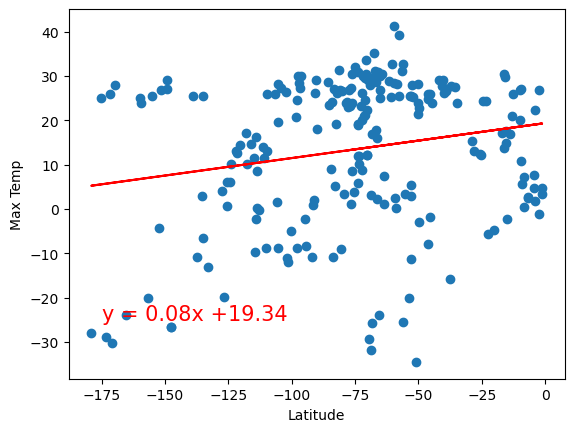

In [17]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Max Temp", (-175, -25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05782583141305571
y = 0.09x +69.89


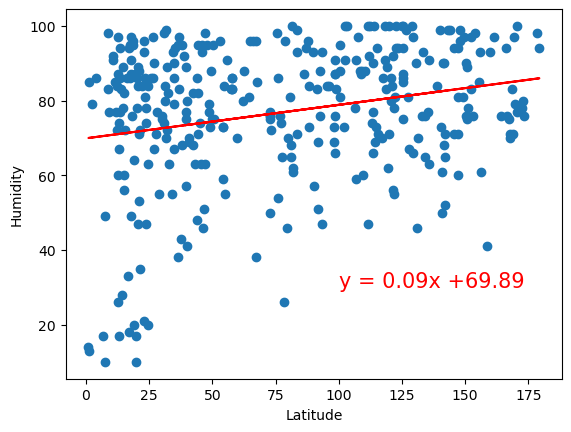

In [18]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity", (100, 30))

The r-value is: 0.012188786942501046
y = -0.06x +63.72


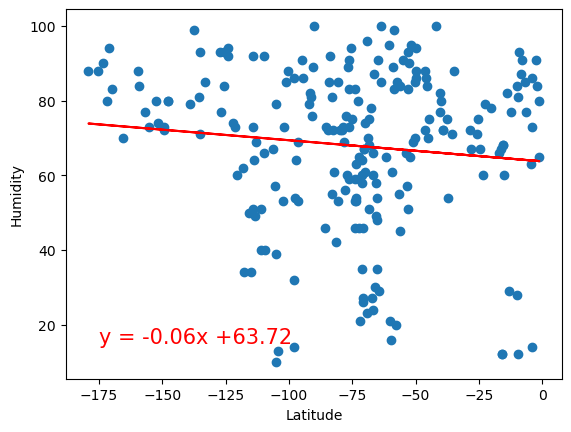

In [19]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity", (-175, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012127920828701497
y = 0.08x +56.87


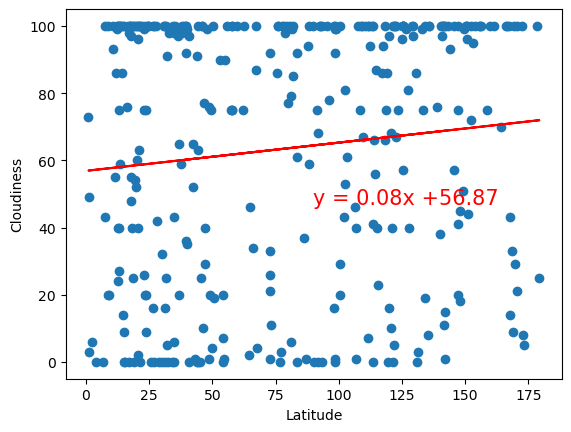

In [20]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness", (90, 47))

The r-value is: 5.6286700980575665e-05
y = -0.01x +57.36


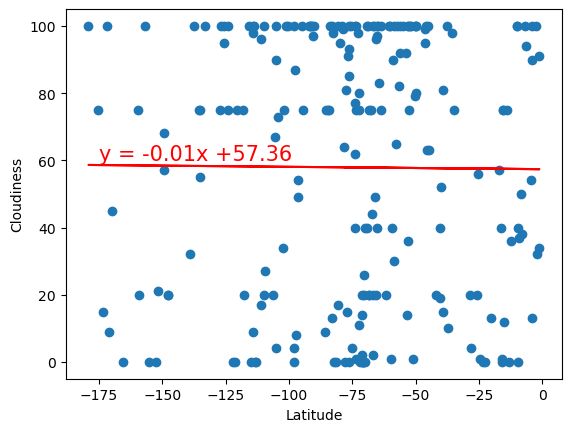

In [21]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness", (-175, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0011358167590073875
y = 0.0x +3.41


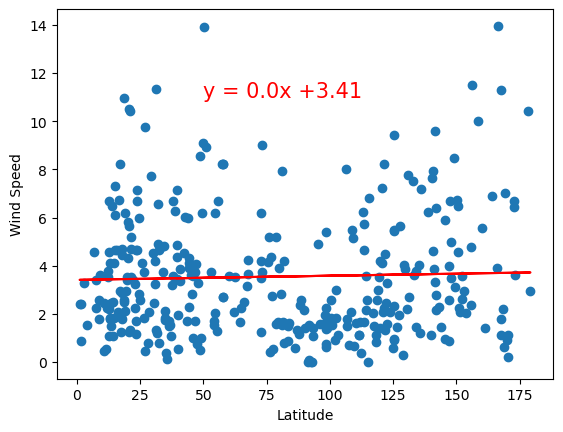

In [22]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed", (50, 11))

The r-value is: 0.03896426499391833
y = 0.01x +5.37


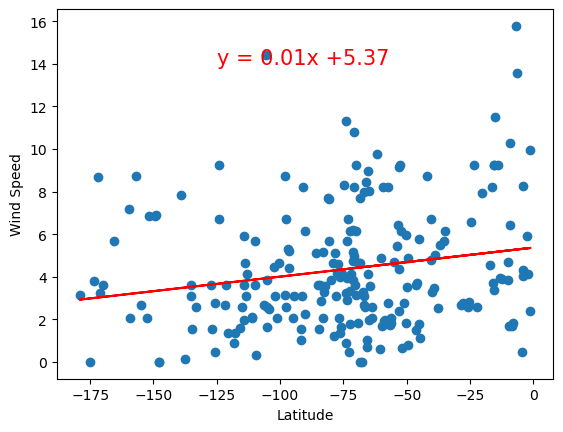

In [23]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", (-125, 14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE